In [20]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
import numpy as np
from IPython.display import display
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("AR_cleaned_ISB_aging_new_merge_fi_wgcna.csv")
print(df.shape)

(769, 78)


,public_client_id,sex,age,merge_fi,MElightcyan,MEgreenyellow,MEpurple,MEblue,MEbrown,MEgreen,MEmidnightblue,MEcyan,MEtan,MEyellow,MEblack,MEmagenta,MEred,MEsalmon,MEpink,MEturquoise,MEgrey,MEturquoise_prots,MEblue_prots,MEbrown_prots,MEgrey_prots,A/G RATIO,ALAT (SGPT),ALBUMIN,ALKALINE PHOSPHATASE,ARACHIDONIC ACID,ASAT (SGOT),"BILIRUBIN, TOTAL",BUN/CREAT RATIO,CALCIUM,CARBON DIOXIDE (CO2),CHLORIDE,"CHOLESTEROL, TOTAL","CREATININE ENZ, SER",CRP HIGH SENSITIVITY,DHA,DPA,EPA,FERRITIN,"GFR, MDRD","GFR, MDRD, AFRICAN AM",GGT,GLOBULIN,GLUCOSE,GLYCOHEMOGLOBIN A1C,HDL CHOL DIRECT,HDL PARTICLE NUMBER,HOMA-IR,"HOMOCYSTEINE, SERUM",INSULIN,LDL PARTICLE NUMBER,LDL SMALL,LDL-CHOL CALCULATION,LDL_SIZE,LINOLEIC_ACID,LPIR_SCORE,OMEGA-3 INDEX,OMEGA-6/OMEGA-3 RATIO,OMEGA_3_TOTAL,OMEGA_6_TOTAL,POTASSIUM,"PROTEIN, TOTAL SERUM",SODIUM,TRIGLYCERIDES,Triglyceride HDL Ratio,UREA NITROGEN,URIC ACID,"VITAMIN D, 25-OH TOT",race_black or african-american,race_east asian,race_hispanic latino or spanish origin,race_other,race_south asian,race_white
0,01001621,0,54,0.125373,0.009159,-0.004992,0.042815,0.020384,-0.023159,-0.029559,-0.012912,0.026543,-0.011651,0.010201,-0.033937,0.013953,-0.003646,-0.052338,-0.012892,-0.002270,0.006631,-0.018373,-0.003168,-0.007544,0.008927,1.8,6.0,3.9,67.0,11.2,9.0,0.2,20.0,9.2,24.0,102.0,189.0,0.97,1.92,2.2,1.3,0.6,68.0,66.0,77.0,8.0,2.2,87.0,5.6,62.0,32.0,0.859259,11.6,4.0,1392.0,343.0,114.0,21.6,29.6,25.0,4.1,10.8,4.1,44.2,4.0,6.1,142.0,63.0,1.016129,19.0,6.1,30.5,False,False,False,False,False,True
1,01003555,1,47,0.245455,-0.034732,-0.010245,0.104725,0.016472,0.008064,0.012080,0.011604,0.058495,0.028027,0.039301,-0.015508,0.006116,0.037545,-0.022143,0.028911,-0.019803,-0.007771,0.009569,0.009963,0.004403,0.024474,2.0,38.0,4.5,78.0,10.0,25.0,0.3,12.0,9.4,22.0,101.0,257.0,1.07,0.93,1.8,1.0,0.5,28.0,82.0,95.0,31.0,2.2,102.0,5.3,47.0,32.3,2.392593,10.0,9.5,2484.0,1506.0,175.0,20.0,29.5,70.0,3.3,13.1,3.3,43.2,4.6,6.7,140.0,176.0,3.744681,13.0,4.7,29.3,False,False,False,False,False,True
2,01003758,0,33,0.096517,-0.017783,-0.017407,-0.032138,-0.033932,-0.046344,0.001664,0.043708,0.019792,-0.007266,-0.008230,-0.011668,-0.008740,-0.024079,-0.006342,-0.020427,0.054047,-0.021361,0.008914,0.003977,-0.011993,0.028680,1.8,14.0,4.4,49.0,10.2,18.0,0.4,17.0,9.5,23.0,99.0,159.0,0.71,1.01,2.4,0.7,0.3,53.0,113.0,130.0,19.0,2.4,77.0,4.8,87.0,47.7,1.064691,7.5,5.6,634.0,90.0,59.0,21.0,24.5,26.0,3.4,11.6,3.4,39.6,4.0,6.8,139.0,63.0,0.724138,12.0,4.4,40.8,False,False,False,False,False,True
3,01004551,0,35,0.134826,0.004942,-0.023584,-0.029402,0.013449,-0.032275,-0.014217,0.023114,-0.039783,-0.037760,0.012189,-0.039137,0.012865,0.008112,-0.046145,-0.029450,-0.037475,0.050218,-0.032174,0.022518,-0.007890,-0.026328,1.6,17.0,4.0,99.0,11.5,19.0,0.4,15.0,8.5,24.0,101.0,198.0,0.74,0.18,1.9,1.0,0.4,41.0,105.0,121.0,6.0,2.5,79.0,5.2,51.0,31.2,1.131358,13.9,5.8,1409.0,337.0,130.0,21.7,28.4,25.0,3.3,13.1,3.3,43.3,4.2,6.5,139.0,83.0,1.627451,11.0,5.5,17.8,False,False,False,False,False,True
4,01006225,0,38,0.259701,0.032993,-0.006151,-0.006772,-0.003167,0.038353,-0.013992,0.019927,-0.010859,0.008608,-0.012860,-0.036614,-0.027978,-0.002400,-0.041678,-0.046364,-0.011555,0.049733,0.012178,-0.010986,0.010039,-0.024647,1.8,22.0,4.4,61.0,11.9,18.0,0.3,16.0,9.3,20.0,103.0,221.0,0.75,1.27,1.5,1.1,0.6,29.0,101.0,117.0,19.0,2.4,97.0,5.4,53.0,40.3,2.514815,7.6,10.5,1757.0,606.0,149.0,21.1,25.5,67.0,3.2,12.9,3.2,41.4,4.3,6.8,140.0,93.0,1.754717,12.0,4.5,19.2,False,False,False,False,False,True


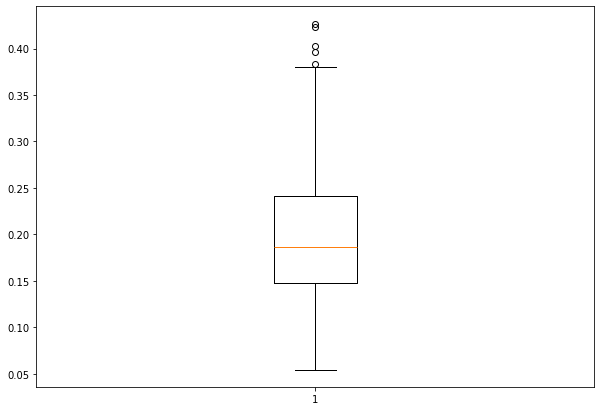

In [14]:
data = df['merge_fi']
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

In [15]:
cutoff = df['merge_fi'].quantile(0.75)
print(cutoff)

df['merge_fi_class'] = (df['merge_fi'] > cutoff).astype(int)

merge_cats = df['merge_fi_class'].value_counts()
print(merge_cats)

0.241414141
merge_fi_class
0    577
1    192
Name: count, dtype: int64


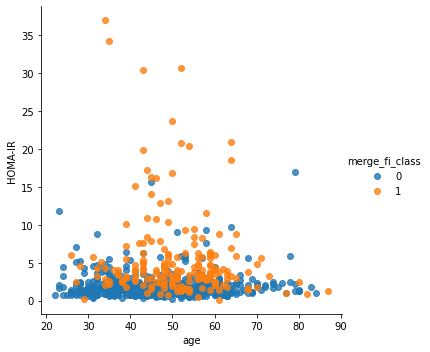

In [16]:
sns.lmplot(x='age',
           y='HOMA-IR',
           hue='merge_fi_class',
           data=df,
           fit_reg=False)
plt.show()

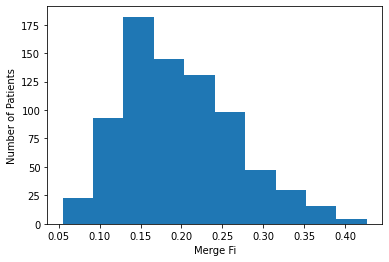

In [17]:
plt.hist(df['merge_fi'])
plt.xlabel('Merge Fi')
plt.ylabel('Number of Patients')
# plt.title('')
plt.grid(False)
plt.show()

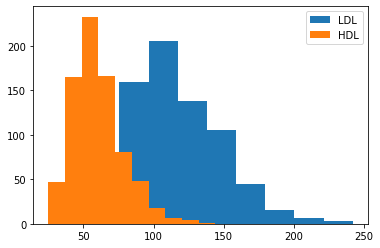

In [18]:
plt.hist(df["LDL-CHOL CALCULATION"].dropna().tolist(), label="LDL")
plt.hist(df["HDL CHOL DIRECT"].dropna().tolist(), label="HDL")
plt.legend()

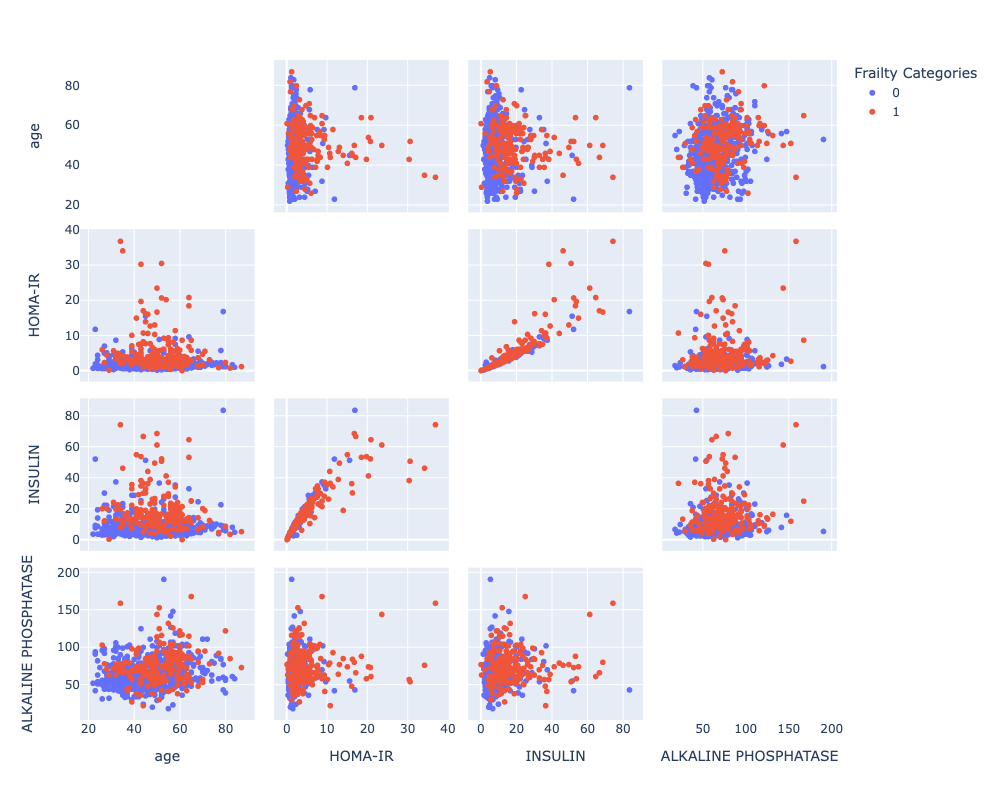

In [31]:
import plotly.express as px

# Define your color mapping for binary classes
color_map = {0: 'blue', 1: 'red'}

fig = px.scatter_matrix(df,
    dimensions=columns,
    color="merge_fi_class", symbol="merge_fi_class",
    color_discrete_map=color_map,
    # title="Scatter matrix of dataset",
    labels={col:col.replace('_', ' ') for col in df.columns})
fig.update_traces(diagonal_visible=False, marker=None)

fig.update_layout(
    autosize=False,
    width=1000, 
    height=800,
    legend_title_text="Frailty Categories"
)

fig.show()